In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model
import keras.backend as K

Using TensorFlow backend.


In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import skimage as sk

In [2]:
import random
from skimage import util

In [3]:
from matplotlib import image


In [4]:
import cv2
import tensorflow as tf

In [5]:
import warnings

In [6]:
# Augmentor is library used for data augmentation and artificial generation of image data for our emotion detection tasks.

import Augmentor

In [3]:
# load the dataset i.e. csv file from fer2013 challenge
face = pd.read_csv('fer2013/Face Expressions.csv')

In [4]:
print("No of total faces:", face.shape[0])

No of total faces: 35887


In [9]:
train = 0
test = 0
other = 0
for i in range(len(face)):
    if face['Usage'][i] == 'Training':
        train += 1
    elif face['Usage'][i] == 'PrivateTest':
        test += 1
    else :
        other += 1

In [10]:
print('No of training samples:' ,train)
print('No of public test samples:', other)
print('No of private test samples:', test)

No of training samples: 28709
No of public test samples: 3589
No of private test samples: 3589


In [5]:
face['label'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: label, dtype: int64

0 = Happy
1 = Sad
2 = Surprise
3 = Angry
4 = Disgust
5 = Fear
6 = Neutral

In [6]:
# create a new dataframe which contain only rows which have label =1

disgust = face[face['label'] == 1]
angry = face[face['label'] == 0]
fear = face[face['label'] == 2]
happy = face[face['label'] == 3]
sad = face[face['label'] == 4]
surprise = face[face['label'] == 5]
neutral = face[face['label'] == 6]

In [30]:
disgust['label'].value_counts()

1    547
Name: label, dtype: int64

In [ ]:
# drop the Usage columns in face dataframe
new_face = face.copy()
new_face = new_face.drop('Usage',axis = 1)
print(new_face.shape)

In [ ]:
print(face.label.unique() ) 
face.label.value_counts()

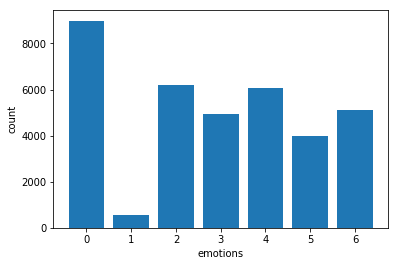

In [14]:

# Let's start by visualizing the distribution of emotions in the dataset. 
# 0- neutral
# 1- angry
# 2- disgust
# 3- fear
# 4- happy
# 5- sad
# 6- surprise

fig, ax = plt.subplots()  
x = face.label.unique()  
y = face.label.value_counts()  
# Plotting the bar graph  
ax.bar(x, y)  
plt.xlabel('emotions')
plt.ylabel('count')
plt.show()  

### extract the pixels values from column of pixels from dataset

In [15]:
# extract the pixels values from column of pixels from dataset
pixels = face['pixels'].tolist() # 1
width, height = 48, 48
faces = []
for pixel_sequence in pixels:
    face_ = [int(pixel) for pixel in pixel_sequence.split(' ')] # 2
    face_ = np.asarray(face_).reshape(width, height) # 3
    faces.append(face_.astype('float64'))

faces = np.asarray(faces)

# split the dataset according to different classes i.e. 7 emotion classes

#  angry faces

In [31]:
#for angry

# extract the pixels values from column of pixels from dataset
pixels = angry['pixels'].tolist() # 1
width, height = 48, 48
faces_angry = []
for pixel_sequence in pixels:
    face_ = [int(pixel) for pixel in pixel_sequence.split(' ')] # 2
    face_ = np.asarray(face_).reshape(width, height) # 3
    
    # There is an issue for normalizing images. Just comment out 4 and 5 lines until when I found the solution.
    # face = face / 255.0 # 4
    # face = cv2.resize(face.astype('uint8'), (width, height)) # 5
    faces_angry.append(face_.astype('float64'))

faces_angry = np.asarray(faces_angry)


In [32]:
print('No of angry faces:', faces_angry.shape[0])

No of angry faces: 4953


In [33]:
for i in range(len(faces_angry)):
    image.imsave('split_dataset/angry_faces/'+str(i)+'.png', faces_angry[i])

### Data augmentation for Angry Faces

In [34]:
path_to_data = 'split_dataset/angry_faces/'

# instantiate a Pipeline object that points to a directory on our file system

p = Augmentor.Pipeline(path_to_data)

Initialised with 4953 image(s) found.
Output directory set to split_dataset/angry_faces/output.

In [20]:
# path = 'split_dataset/output/'
# p = Augmentor.Pipeline(path)


In [35]:
# #Convert images to black and white
# p.black_and_white(1,128)  

# #Flip (mirror) the image along either its horizontal or vertical axis
p.flip_random(1)

# # #Performs a random, elastic gaussian distortion on an image.
p.gaussian_distortion(probability = 0.8, grid_width = 2, grid_height = 10, magnitude = 5, corner = 'bell',
                    method = 'out', mex=0.5, mey=0.5, sdx=0.05, sdy=0.05)

# # # #Convert images to greyscale
# # p.greyscale(probability = 1)

# #Random change brightness of an image
p.random_brightness(probability = 0.7, min_factor = 0.8, max_factor = 1.6)

# #Random change image contrast
# p.random_contrast(probability = 0.7, min_factor = 0.8, max_factor = 1.6)

# #Random change saturation of an image
# p.random_color(probability = 1, min_factor = 0.8, max_factor = 1.6)

# #Rotate an image by an arbitrary amount
p.rotate(probability = 1, max_left_rotation = 25, max_right_rotation = 25)

# #Shear the image by a specified number of degrees
p.shear(probability = 0.9, max_shear_left = 24, max_shear_right = 23)

# #Skew an image in a random direction, either left to right, top to bottom, or one of 8 corner directions.
# p.skew(probability = 1, magnitude=1)

# #Zooms into an image at a random location within the image
# p.zoom_random(probability = 0.8, percentage_area = 0.5, randomise_percentage_area=False)

In [36]:
len(faces_angry)

4953

In [37]:
# p.sample(100)
# augmented_images, labels = 
p.sample(4953)


Processing <PIL.Image.Image image mode=RGBA size=48x48 at 0x1BE90A0BB70>: 100%|█| 4953/4953 [05:33<00:00, 14.86 Samples/s] 


# Disgust Faces

In [38]:
# for disgust

# extract the pixels values from column of pixels from dataset that have label = 1
pixels_d = disgust['pixels'].tolist() # 1
width, height = 48, 48
faces_d = []
for pixel_sequence in pixels_d:
    face_d = [int(pixel) for pixel in pixel_sequence.split(' ')] # 2
    face_d = np.asarray(face_d).reshape(width, height) # 3
    
    # There is an issue for normalizing images. Just comment out 4 and 5 lines until when I found the solution.
    # face = face / 255.0 # 4
    # face = cv2.resize(face.astype('uint8'), (width, height)) # 5
    faces_d.append(face_d.astype('float32'))

faces_d = np.asarray(faces_d)

### Data Augmentation for disgust faces

In [39]:
# save disgust faces from csv file as images into new folder

for i in range(len(faces_d)):
    image.imsave('split_dataset/disgust_faces/'+str(i)+'.png', faces_d[i])


In [40]:
path_to_disgust = 'split_dataset/disgust_faces/'

# instantiate a Pipeline object that points to a directory on our file system

d = Augmentor.Pipeline(path_to_disgust)

Initialised with 547 image(s) found.
Output directory set to split_dataset/disgust_faces/output.

In [41]:
# #Convert images to black and white
# p.black_and_white(1,128)  

# #Flip (mirror) the image along either its horizontal or vertical axis
d.flip_random(1)

# # #Performs a random, elastic gaussian distortion on an image.
d.gaussian_distortion(probability = 0.8, grid_width = 2, grid_height = 10, magnitude = 5, corner = 'bell',
                    method = 'out', mex=0.5, mey=0.5, sdx=0.05, sdy=0.05)

# # # #Convert images to greyscale
# # p.greyscale(probability = 1)

# #Random change brightness of an image
d.random_brightness(probability = 0.7, min_factor = 0.8, max_factor = 1.6)

# #Random change image contrast
# p.random_contrast(probability = 0.7, min_factor = 0.8, max_factor = 1.6)

# #Random change saturation of an image
# p.random_color(probability = 1, min_factor = 0.8, max_factor = 1.6)

# #Rotate an image by an arbitrary amount
d.rotate(probability = 1, max_left_rotation = 25, max_right_rotation = 25)

# #Shear the image by a specified number of degrees
d.shear(probability = 0.9, max_shear_left = 24, max_shear_right = 23)

# #Skew an image in a random direction, either left to right, top to bottom, or one of 8 corner directions.
# p.skew(probability = 1, magnitude=1)

# #Zooms into an image at a random location within the image
# p.zoom_random(probability = 0.8, percentage_area = 0.5, randomise_percentage_area=False)

In [42]:
faces_d.shape

(547, 48, 48)

In [43]:
# p.sample(100)
# augmented_images, labels = 
d.sample(7000)



Processing <PIL.Image.Image image mode=RGBA size=48x48 at 0x1BE7E9E6438>: 100%|█| 7000/7000 [06:04<00:00, 19.19 Samples/s]


In [87]:
fear_path = 'split_dataset/fear_faces'
happy_path = 'split_dataset/happy_faces'
sur_path = 'split_dataset/surprise_faces'
sad_path = 'split_dataset/sad_faces'
neutral_path = 'split_dataset/neutral_faces'




if not os.path.exists(fear_path):
    os.makedirs(fear_path)
    
if not os.path.exists(happy_path):
    os.makedirs(happy_path)
    
if not os.path.exists(sur_path):
    os.makedirs(sur_path)
    
if not os.path.exists(sad_path):
    os.makedirs(sad_path)
    
if not os.path.exists(neutral_path):
    os.makedirs(neutral_path)

# Fear Faces

In [44]:
# for fear

# extract the pixels values from column of pixels from dataset
pixels = fear['pixels'].tolist() # 1
width, height = 48, 48
faces_fear = []
for pixel_sequence in pixels:
    face_ = [int(pixel) for pixel in pixel_sequence.split(' ')] # 2
    face_ = np.asarray(face_).reshape(width, height) # 3
    
    # There is an issue for normalizing images. Just comment out 4 and 5 lines until when I found the solution.
    # face = face / 255.0 # 4
    # face = cv2.resize(face.astype('uint8'), (width, height)) # 5
    faces_fear.append(face_.astype('float64'))

faces_fear = np.asarray(faces_fear)

In [45]:
print('no of fear faces:', faces_fear.shape[0])

no of fear faces: 5121


In [46]:
# save all rows as images label with fear in our dataset

for i in range(len(faces_fear)):
    image.imsave('split_dataset/fear_faces/'+str(i)+'.png', faces_fear[i])

### Data Augmentation for fear faces

In [47]:
path_to_fear = 'split_dataset/fear_faces/'

# instantiate a Pipeline object that points to a directory on our file system

f = Augmentor.Pipeline(path_to_fear)

# #Convert images to black and white
# p.black_and_white(1,128)  

# #Flip (mirror) the image along either its horizontal or vertical axis
f.flip_random(1)

# # #Performs a random, elastic gaussian distortion on an image.
f.gaussian_distortion(probability = 0.8, grid_width = 2, grid_height = 10, magnitude = 5, corner = 'bell',
                    method = 'out', mex=0.5, mey=0.5, sdx=0.05, sdy=0.05)

# # # #Convert images to greyscale
# # p.greyscale(probability = 1)

# #Random change brightness of an image
f.random_brightness(probability = 0.7, min_factor = 0.8, max_factor = 1.6)

# #Random change image contrast
# p.random_contrast(probability = 0.7, min_factor = 0.8, max_factor = 1.6)

# #Random change saturation of an image
# p.random_color(probability = 1, min_factor = 0.8, max_factor = 1.6)

# #Rotate an image by an arbitrary amount
f.rotate(probability = 1, max_left_rotation = 25, max_right_rotation = 25)

# #Shear the image by a specified number of degrees
f.shear(probability = 0.9, max_shear_left = 24, max_shear_right = 23)

# #Skew an image in a random direction, either left to right, top to bottom, or one of 8 corner directions.
# p.skew(probability = 1, magnitude=1)

# #Zooms into an image at a random location within the image
# p.zoom_random(probability = 0.8, percentage_area = 0.5, randomise_percentage_area=False)

Initialised with 5121 image(s) found.
Output directory set to split_dataset/fear_faces/output.

In [48]:
f.sample(5121)

Processing <PIL.Image.Image image mode=RGBA size=48x48 at 0x1BE90A11128>: 100%|█| 5121/5121 [04:17<00:00, 19.89 Samples/s]


In [49]:
len(faces_fear)

5121

# Happy Faces

### no need of augmentation for happy faces

In [50]:
# for happy

# extract the pixels values from column of pixels from dataset
pixels = happy['pixels'].tolist() # 1
width, height = 48, 48
faces_happy = []
for pixel_sequence in pixels:
    face_ = [int(pixel) for pixel in pixel_sequence.split(' ')] # 2
    face_ = np.asarray(face_).reshape(width, height) # 3
    
    # There is an issue for normalizing images. Just comment out 4 and 5 lines until when I found the solution.
    # face = face / 255.0 # 4
    # face = cv2.resize(face.astype('uint8'), (width, height)) # 5
    faces_happy.append(face_.astype('float64'))

faces_happy = np.asarray(faces_happy)

In [51]:
# save fear faces from csv file as images into new folder

for i in range(len(faces_happy)):
#     np.save('split_dataset/angry_faces/'+str(i)+'.png', faces_angry[i])
    image.imsave('split_dataset/happy_faces/'+str(i)+'.png', faces_happy[i])

### Data Augmentation for Happy faces

In [52]:
path_to_happy = 'split_dataset/happy_faces/'

# instantiate a Pipeline object that points to a directory on our file system

h = Augmentor.Pipeline(path_to_happy)

# #Convert images to black and white
# p.black_and_white(1,128)  

# #Flip (mirror) the image along either its horizontal or vertical axis
h.flip_random(1)

# # #Performs a random, elastic gaussian distortion on an image.
h.gaussian_distortion(probability = 0.8, grid_width = 2, grid_height = 10, magnitude = 5, corner = 'bell',
                    method = 'out', mex=0.5, mey=0.5, sdx=0.05, sdy=0.05)

# # # #Convert images to greyscale
# # p.greyscale(probability = 1)

# #Random change brightness of an image
h.random_brightness(probability = 0.7, min_factor = 0.8, max_factor = 1.6)

# #Random change image contrast
# p.random_contrast(probability = 0.7, min_factor = 0.8, max_factor = 1.6)

# #Random change saturation of an image
# p.random_color(probability = 1, min_factor = 0.8, max_factor = 1.6)

# #Rotate an image by an arbitrary amount
h.rotate(probability = 1, max_left_rotation = 25, max_right_rotation = 25)

# #Shear the image by a specified number of degrees
h.shear(probability = 0.9, max_shear_left = 24, max_shear_right = 23)

# #Skew an image in a random direction, either left to right, top to bottom, or one of 8 corner directions.
# p.skew(probability = 1, magnitude=1)

# #Zooms into an image at a random location within the image
# p.zoom_random(probability = 0.8, percentage_area = 0.5, randomise_percentage_area=False)

Initialised with 8989 image(s) found.
Output directory set to split_dataset/happy_faces/output.

In [53]:

h.sample(len(faces_happy))

Processing <PIL.Image.Image image mode=RGBA size=48x48 at 0x1BE390B6A20>: 100%|█| 8989/8989 [09:53<00:00, 15.14 Samples/s]


# Surprise faces

In [54]:
# for surprise
# extract the pixels values from column of pixels from dataset
pixels = surprise['pixels'].tolist() # 1
width, height = 48, 48
faces_sur = []
for pixel_sequence in pixels:
    face_ = [int(pixel) for pixel in pixel_sequence.split(' ')] # 2
    face_ = np.asarray(face_).reshape(width, height) # 3
    
    # There is an issue for normalizing images. Just comment out 4 and 5 lines until when I found the solution.
    # face = face / 255.0 # 4
    # face = cv2.resize(face.astype('uint8'), (width, height)) # 5
    faces_sur.append(face_.astype('float64'))

faces_sur = np.asarray(faces_sur)

### data augmentation for surprise faces

In [55]:
# save fear faces from csv file as images into new folder

for i in range(len(faces_sur)):
#     np.save('split_dataset/angry_faces/'+str(i)+'.png', faces_angry[i])
    image.imsave('split_dataset/surprise_faces/'+str(i)+'.png', faces_sur[i])

    

path_to_sur = 'split_dataset/surprise_faces/'

# instantiate a Pipeline object that points to a directory on our file system

sur = Augmentor.Pipeline(path_to_sur)

# #Convert images to black and white
# p.black_and_white(1,128)  

# #Flip (mirror) the image along either its horizontal or vertical axis
sur.flip_random(1)

# # #Performs a random, elastic gaussian distortion on an image.
sur.gaussian_distortion(probability = 0.8, grid_width = 2, grid_height = 10, magnitude = 5, corner = 'bell',
                    method = 'out', mex=0.5, mey=0.5, sdx=0.05, sdy=0.05)

# # # #Convert images to greyscale
# # p.greyscale(probability = 1)

# #Random change brightness of an image
sur.random_brightness(probability = 0.7, min_factor = 0.8, max_factor = 1.6)

# #Random change image contrast
# p.random_contrast(probability = 0.7, min_factor = 0.8, max_factor = 1.6)

# #Random change saturation of an image
# p.random_color(probability = 1, min_factor = 0.8, max_factor = 1.6)

# #Rotate an image by an arbitrary amount
sur.rotate(probability = 1, max_left_rotation = 25, max_right_rotation = 25)

# #Shear the image by a specified number of degrees
sur.shear(probability = 0.9, max_shear_left = 24, max_shear_right = 23)

# #Skew an image in a random direction, either left to right, top to bottom, or one of 8 corner directions.
# p.skew(probability = 1, magnitude=1)

# #Zooms into an image at a random location within the image
# p.zoom_random(probability = 0.8, percentage_area = 0.5, randomise_percentage_area=False)

Initialised with 4002 image(s) found.
Output directory set to split_dataset/surprise_faces/output.

In [56]:

sur.sample(len(faces_sur))

Processing <PIL.Image.Image image mode=RGBA size=48x48 at 0x1BE391046D8>: 100%|█| 4002/4002 [05:03<00:00, 13.17 Samples/s]


# sad Faces

# no augmentation for sad faces

In [57]:
# for sad

# extract the pixels values from column of pixels from dataset
pixels = sad['pixels'].tolist() # 1
width, height = 48, 48
faces_sad = []
for pixel_sequence in pixels:
    face_ = [int(pixel) for pixel in pixel_sequence.split(' ')] # 2
    face_ = np.asarray(face_).reshape(width, height) # 3
    
    # There is an issue for normalizing images. Just comment out 4 and 5 lines until when I found the solution.
    # face = face / 255.0 # 4
    # face = cv2.resize(face.astype('uint8'), (width, height)) # 5
    faces_sad.append(face_.astype('float64'))

faces_sad = np.asarray(faces_sad)

### data augmentation for sad faces

In [58]:
# save fear faces from csv file as images into new folder

for i in range(len(faces_sad)):
#     np.save('split_dataset/angry_faces/'+str(i)+'.png', faces_angry[i])
    image.imsave('split_dataset/sad_faces/'+str(i)+'.png', faces_sad[i])

    

path_to_sad = 'split_dataset/sad_faces/'

# instantiate a Pipeline object that points to a directory on our file system

s = Augmentor.Pipeline(path_to_sad)

# #Convert images to black and white
# p.black_and_white(1,128)  

# #Flip (mirror) the image along either its horizontal or vertical axis
s.flip_random(1)

# # #Performs a random, elastic gaussian distortion on an image.
s.gaussian_distortion(probability = 0.8, grid_width = 2, grid_height = 10, magnitude = 5, corner = 'bell',
                    method = 'out', mex=0.5, mey=0.5, sdx=0.05, sdy=0.05)

# # # #Convert images to greyscale
# # p.greyscale(probability = 1)

# #Random change brightness of an image
s.random_brightness(probability = 0.7, min_factor = 0.8, max_factor = 1.6)

# #Random change image contrast
# p.random_contrast(probability = 0.7, min_factor = 0.8, max_factor = 1.6)

# #Random change saturation of an image
# p.random_color(probability = 1, min_factor = 0.8, max_factor = 1.6)

# #Rotate an image by an arbitrary amount
s.rotate(probability = 1, max_left_rotation = 25, max_right_rotation = 25)

# #Shear the image by a specified number of degrees
s.shear(probability = 0.9, max_shear_left = 24, max_shear_right = 23)

# #Skew an image in a random direction, either left to right, top to bottom, or one of 8 corner directions.
# p.skew(probability = 1, magnitude=1)

# #Zooms into an image at a random location within the image
# p.zoom_random(probability = 0.8, percentage_area = 0.5, randomise_percentage_area=False)

Initialised with 6077 image(s) found.
Output directory set to split_dataset/sad_faces/output.

In [59]:

s.sample(2000)

Processing <PIL.Image.Image image mode=RGBA size=48x48 at 0x1BE845510F0>: 100%|█| 2000/2000 [02:37<00:00, 12.72 Samples/s]


# Neutral Faces

In [60]:
# for neutral

# extract the pixels values from column of pixels from dataset
pixels = neutral['pixels'].tolist() # 1
width, height = 48, 48
faces_neutral = []
for pixel_sequence in pixels:
    face_ = [int(pixel) for pixel in pixel_sequence.split(' ')] # 2
    face_ = np.asarray(face_).reshape(width, height) # 3
    
    # There is an issue for normalizing images. Just comment out 4 and 5 lines until when I found the solution.
    # face = face / 255.0 # 4
    # face = cv2.resize(face.astype('uint8'), (width, height)) # 5
    faces_neutral.append(face_.astype('float64'))

faces_neutral = np.asarray(faces_neutral)

### no augmentation for neutral faces

### Data augmentation for neutral faces

In [61]:
# save fear faces from csv file as images into new folder

for i in range(len(faces_neutral)):
#     np.save('split_dataset/angry_faces/'+str(i)+'.png', faces_angry[i])
    image.imsave('split_dataset/neutral_faces/'+str(i)+'.png', faces_neutral[i])

    

path_to_neutral = 'split_dataset/neutral_faces/'

# instantiate a Pipeline object that points to a directory on our file system

n = Augmentor.Pipeline(path_to_neutral)

# #Convert images to black and white
# p.black_and_white(1,128)  

# #Flip (mirror) the image along either its horizontal or vertical axis
n.flip_random(1)

# # #Performs a random, elastic gaussian distortion on an image.
n.gaussian_distortion(probability = 0.8, grid_width = 2, grid_height = 10, magnitude = 5, corner = 'bell',
                    method = 'out', mex=0.5, mey=0.5, sdx=0.05, sdy=0.05)

# # # #Convert images to greyscale
# # p.greyscale(probability = 1)

# #Random change brightness of an image
n.random_brightness(probability = 0.7, min_factor = 0.8, max_factor = 1.6)

# #Random change image contrast
# p.random_contrast(probability = 0.7, min_factor = 0.8, max_factor = 1.6)

# #Random change saturation of an image
# p.random_color(probability = 1, min_factor = 0.8, max_factor = 1.6)

# #Rotate an image by an arbitrary amount
n.rotate(probability = 1, max_left_rotation = 25, max_right_rotation = 25)

# #Shear the image by a specified number of degrees
n.shear(probability = 0.9, max_shear_left = 24, max_shear_right = 23)

# #Skew an image in a random direction, either left to right, top to bottom, or one of 8 corner directions.
# p.skew(probability = 1, magnitude=1)

# #Zooms into an image at a random location within the image
# p.zoom_random(probability = 0.8, percentage_area = 0.5, randomise_percentage_area=False)

Initialised with 6198 image(s) found.
Output directory set to split_dataset/neutral_faces/output.

In [62]:

n.sample(2000)

Processing <PIL.Image.Image image mode=RGBA size=48x48 at 0x1BE850820B8>: 100%|█| 2000/2000 [02:29<00:00, 13.33 Samples/s]


In [ ]:
# #Expanding the dimension of channel for each image
# faces = np.expand_dims(faces, -1) # 6

In [ ]:
faces.shape

In [7]:
# Converting the labels to catergorical matrix
emotions = pd.get_dummies(face['label']) # 7

#  Converting the labels to catergorical matrix for all the classes 

In [8]:
label_d = disgust['label']
label_a = angry['label']
label_f = fear['label']
label_h = happy['label']
label_s = sad['label']
label_sp = surprise['label']
label_n = neutral['label']

In [9]:
# save all label as numpy array into hardisk

np.save('split_dataset/angry_label.npy', label_a)
np.save('split_dataset/disgust_label.npy',label_d)
np.save('split_dataset/happy_label.npy',label_h)
np.save('split_dataset/fear_label.npy',label_f)
np.save('split_dataset/sad_label.npy',label_s)
np.save('split_dataset/surprise_label.npy',label_sp)
np.save('split_dataset/neutral_label.npy',label_n)